In [1]:
import assignment.load as load
import assignment.display as display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import KNearestNeighbour
nn_fuzzy = KNearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'], k=1, fuzzy=True)
nn_not_fuzzy = KNearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'], k=1, fuzzy=False)

In [4]:
import numpy as np

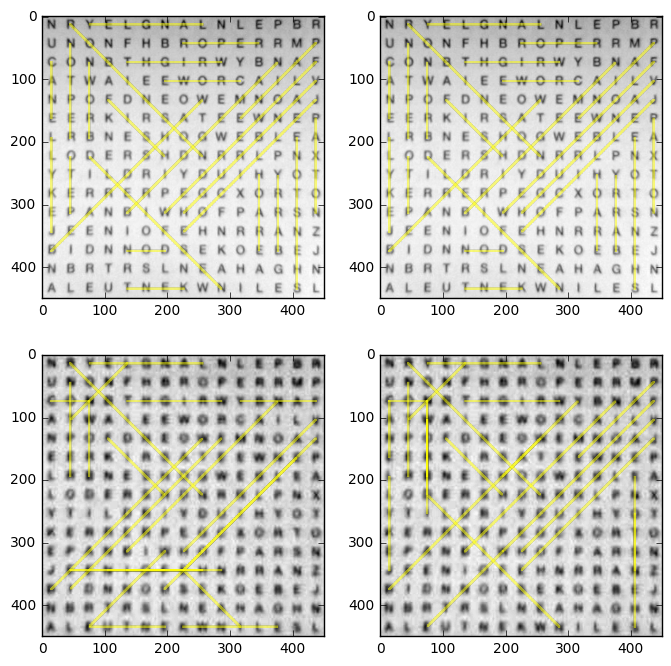

In [5]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
data.wordsearch1.classify(nn_fuzzy)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 2)
data.wordsearch1.classify(nn_not_fuzzy)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 3)
data.wordsearch2.classify(nn_fuzzy)
data.wordsearch2.find_all_and_show(rad=2)

plt.subplot(2, 2, 4)
data.wordsearch2.classify(nn_not_fuzzy)
data.wordsearch2.find_all_and_show(rad=2)

In [6]:
data.wordsearch2.classify(nn_not_fuzzy)
data.wordsearch2.correctness_score(only_score=False)

(14,
 {'barry': (((12, 12), (11, 6)), ((6, 6), (10, 0))),
  'brown': (((2, 6), (1, 0)), ((2, 2), (1, 6))),
  'crowe': (((10, 3), (4, 2)), ((2, 2), (1, 6))),
  'don': (((6, 12), (2, 11)), ((0, 2), (2, 1))),
  'hoare': (((11, 8), (10, 12)), ((6, 10), (0, 14))),
  'kent': (((7, 14), (2, 13)), ((4, 0), (-1, 3))),
  'paxton': (((14, 5), (13, 10)), ((1, 6), (0, -1))),
  'peto': (((1, 10), (0, 5)), ((13, 11), (12, 6))),
  'repton': (((1, 6), (0, -1)), ((2, 3), (1, 8))),
  'roper': (((7, 1), (11, 0)), ((2, 3), (1, 7)))})

In [7]:
nn_fuzzy.loo_test()

(array([[ 45.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.],
        [  0.,  20.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,  22.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   9.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  64.,   1.,   0.,   0.,   0.,   0.,   1.,
           0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   2.],
        [  0.,   0.,   0.,   0.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,
     